In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('C:/Users/sushe/Documents/BDA_Fall_2023/BDA_Fall_2023/Sem 2/BDA 602/BDA602_venv/BDA602/homeprices.csv')
df = df.head(5)

In [18]:
import math
median_bedrooms = math.floor(df.bedrooms.median())
median_bedrooms

3

In [19]:
df.bedrooms = df.bedrooms.fillna(median_bedrooms)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [20]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(df[['area','bedrooms','age']],df.price)

LinearRegression()

In [21]:
reg.predict([[3000,3,40]])

C:\Users\sushe\AppData\Local\Programs\Python\Python 311.1\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([444400.])

In [22]:
reg.predict([[2500,4,5]])

C:\Users\sushe\AppData\Local\Programs\Python\Python 311.1\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([588625.])

In [23]:
reg.coef_

array([   137.25, -26025.  ,  -6825.  ])

In [24]:
reg.intercept_

383724.9999999998

In [25]:
hiring = pd.read_csv('C:/Users/sushe/Documents/BDA_Fall_2023/BDA_Fall_2023/Sem 2/BDA 602/BDA602_venv/BDA602/hiring.csv')
hiring

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [35]:
hiring.experience = hiring.experience.fillna('zero')
hiring['test_score(out of 10)'] = hiring['test_score(out of 10)'].fillna(math.floor(hiring['test_score(out of 10)'].median()))
hiring

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [36]:
import word2number
from word2number import w2n
hiring.experience = hiring.experience.apply(w2n.word_to_num)
hiring

ValueError: Type of input is not string! Please enter a valid number word (eg. 'two million twenty three thousand and forty nine')

In [37]:
reg = linear_model.LinearRegression()
reg.fit(hiring[['experience','test_score(out of 10)','interview_score(out of 10)']],hiring['salary($)'])


LinearRegression()

In [38]:
reg.predict([[2,9,6]])

C:\Users\sushe\AppData\Local\Programs\Python\Python 311.1\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53205.96797671])

In [39]:
reg.predict([[12,10,10]])

C:\Users\sushe\AppData\Local\Programs\Python\Python 311.1\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92002.18340611])

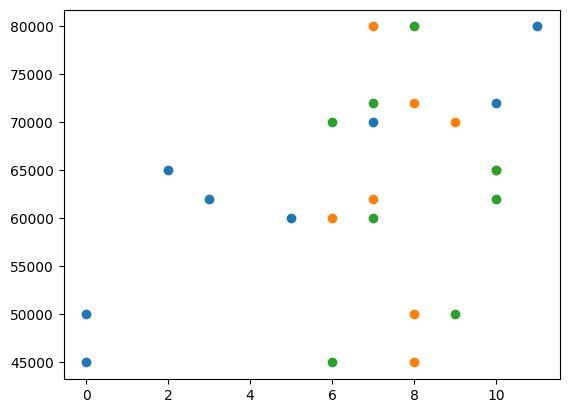

In [44]:
#matplotlib inline
#plot the data points to see the relationship between the variables
plt.scatter(hiring['experience'],hiring['salary($)'])
plt.scatter(hiring['test_score(out of 10)'],hiring['salary($)'])
plt.scatter(hiring['interview_score(out of 10)'],hiring['salary($)'])